In [1]:
!pip uninstall tensorflow-datasets tensorflow-metadata -y
!pip install tensorflow==2.11
!pip install sciann

Found existing installation: tensorflow-datasets 4.9.6
Uninstalling tensorflow-datasets-4.9.6:
  Successfully uninstalled tensorflow-datasets-4.9.6
Found existing installation: tensorflow-metadata 1.15.0
Uninstalling tensorflow-metadata-1.15.0:
  Successfully uninstalled tensorflow-metadata-1.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-esti

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 8.1 MB/s eta 0:00:00


In [6]:
from numpy import pi
import numpy as np
import sciann as sn
from tensorflow import keras
from sciann.utils.math import diff, sign, sin
import matplotlib.pyplot as plt
import time

In [3]:
#Definición de entradas
x = sn.Variable('x')
t = sn.Variable('t')

#Definición de la función a aprender
u = sn.Functional('u', [t,x], 8*[20], 'tanh')

#Restricciones del modelo
L1 = diff(u, t) + u*diff(u,x) - (0.01/pi)*diff(u, x, order=2)
TOL = 0.001
C1 = (1-sign(t - TOL)) * (u + sin(pi*x))
C2 = (1-sign(x - (-1+TOL))) * (u)
C3 = (1+sign(x - ( 1-TOL))) * (u)

#Definición del modelo
burgers_model = sn.SciModel([x, t], [L1, C1, C2, C3], plot_to_file='burgers.png')

burgers_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 t (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 x (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 concat (Concatenate)           (None, 2)            0           ['t[0][0]',                      
                                                                  'x[0][0]']                      
                                                                                                  
 D20b (Dense)                   (None, 20)           60          ['concat[0][0]']             

In [4]:
x_data, t_data = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(0, 1, 100)
)

In [8]:
start_time = time.time()
burgers_history = burgers_model.train([x_data, t_data],
                                      4*['zero'],
                                      learning_rate=0.002,
                                      epochs=5000,
                                      callbacks=[keras.callbacks.EarlyStopping(monitor="loss", min_delta = 0, patience=20,verbose=1)])

print(f"Duración del entrenamiento: {time.time()-start_time}s. ")


Total samples: 10000 
Batch size: 64 
Total batches: 157 

Epoch 1/5000
157/157 [==============================] - 3s 16ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0068 - sub_loss: 0.0017 - mul_4_loss: 0.0049 - mul_5_loss: 4.9728e-05 - mul_6_loss: 7.0511e-05 - lr: 0.0020 - time: 2.5887
Epoch 2/5000
157/157 [==============================] - 3s 17ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0068 - sub_loss: 0.0016 - mul_4_loss: 0.0051 - mul_5_loss: 4.9792e-05 - mul_6_loss: 4.3277e-05 - lr: 0.0020 - time: 2.6094
Epoch 3/5000
157/157 [==============================] - 1s 7ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0236 - sub_loss: 0.0074 - mul_4_loss: 0.0140 - mul_5_loss: 0.0015 - mul_6_loss: 7.1796e-04 - lr: 0.0020 - time: 1.1431
Epoch 4/5000
157/157 [==============================] - 2s 10ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0160 - sub_loss: 7.4834e-04 - mul_4_loss: 0.0128 - mul_5_loss: 0.0017 - mul_6_loss: 7.8125e-04 - lr: 0.0020 - time: 1.6440
Epoch

In [9]:
start_time = time.time()
burgers_entrenamiento_completo = burgers_model.train([x_data, t_data],
                                      4*['zero'],
                                      learning_rate=0.002,
                                      epochs=5000)

print(f"Duración del entrenamiento: {time.time()-start_time}s. ")

Se han truncado las últimas 5000 líneas del flujo de salida.
157/157 [==============================] - 2s 13ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0063 - sub_loss: 0.0011 - mul_4_loss: 0.0051 - mul_5_loss: 5.4817e-06 - mul_6_loss: 3.2223e-05 - lr: 0.0010 - time: 2.1635
Epoch 2503/5000
157/157 [==============================] - 2s 13ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0050 - sub_loss: 4.1032e-04 - mul_4_loss: 0.0046 - mul_5_loss: 1.3730e-06 - mul_6_loss: 9.3631e-07 - lr: 0.0010 - time: 2.1105
Epoch 2504/5000
157/157 [==============================] - 2s 11ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0049 - sub_loss: 5.2633e-04 - mul_4_loss: 0.0044 - mul_5_loss: 5.1459e-06 - mul_6_loss: 2.7798e-06 - lr: 0.0010 - time: 1.7079
Epoch 2505/5000
157/157 [==============================] - 2s 11ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0050 - sub_loss: 9.2588e-04 - mul_4_loss: 0.0041 - mul_5_loss: 8.1556e-06 - mul_6_loss: 5.2484e-06 - lr: 0.0010 - time

Text(0, 0.5, 'Pérdida')

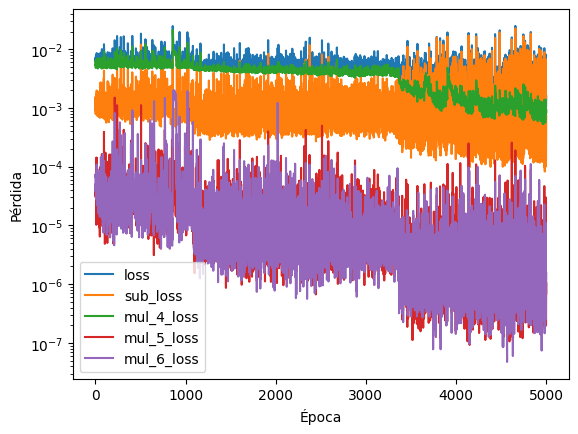

In [12]:
plt.semilogy(burgers_entrenamiento_completo.history['loss'],label="loss")
plt.semilogy(burgers_entrenamiento_completo.history['sub_loss'],label='sub_loss')
plt.semilogy(burgers_entrenamiento_completo.history['mul_4_loss'],label='mul_4_loss')
plt.semilogy(burgers_entrenamiento_completo.history['mul_5_loss'],label='mul_5_loss')
plt.semilogy(burgers_entrenamiento_completo.history['mul_6_loss'],label='mul_6_loss')

plt.legend()
plt.xlabel('Época')
plt.ylabel('Pérdida')

In [13]:
x_test, t_test = np.meshgrid(
    np.linspace(-1, 1, 200),
    np.linspace(0, 1, 200)
)
u_pred = u.eval(burgers_model, [x_test, t_test])

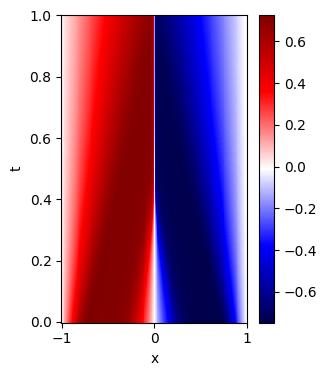

In [14]:
fig = plt.figure(figsize=(3, 4))
plt.pcolor(x_test, t_test, u_pred, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()